# Read data from kaggle


In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"minhhoang3979","key":"a71907d282d4efc1d6f94700a24f5bec"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13791       1119  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8285        628  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3689        260  1.0              
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women           

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c home-credit-default-risk

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip home-credit-default-risk.zip

Archive:  home-credit-default-risk.zip
replace HomeCredit_columns_description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: HomeCredit_columns_description.csv  
replace POS_CASH_balance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [ ]:
#!pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#import sweetviz
%matplotlib inline


In [ ]:
#app_train = pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")
#pos_cash_bal = pd.read_csv("POS_CASH_balance.csv")
#bureau_bal = pd.read_csv("bureau_balance.csv")
#bureau = pd.read_csv("bureau.csv")
#previous_app = pd.read_csv("previous_application.csv")
#installment_payment = pd.read_csv("installments_payments.csv")
#credit_card_bal = pd.read_csv("credit_card_balance.csv")

# Columns Description

In [ ]:
%load_ext google.colab.data_table
cols_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='ISO-8859–1', engine='python')
cols_description

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


# Retrieving The Data

In [ ]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
installment_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# Visualization

In [ ]:
!pip install plotly==5.2.1

     |████████████████████████████████| 21.8 MB 81.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
def first_look(ds):
    numbers_of_missing = ds.isnull().sum()
    percent_of_missing = ds.isnull().sum() / len(ds)*100
    missing_value_table = pd.concat([numbers_of_missing, percent_of_missing], axis = 1, keys = ['numbers_of_missing', 'percent_of missing'])
    missing_value_table = missing_value_table[missing_value_table['numbers_of_missing'] != 0].sort_values('percent_of missing',ascending = False)
    print('Missing values: \n', missing_value_table)
    #missing_value_table = missing_value_table.rename(columns = {0 : 'numbers_of_missing', 1 : 'percent_of missing'}, inplace = True)
    #missing_value_table = missing_value_table.sort_values('percent_of missing', inplace = True)
    print('\n Number of each type of column: \n',ds.dtypes.value_counts())
    print('\n Number of unique classes in each object column: \n',ds.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    #return missing_value_table

In [ ]:
#from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
#init_notebook_mode(connected=True)
fig = go.Figure()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello Figure')
fig.show()

In [ ]:
print(app_train.NAME_EDUCATION_TYPE.value_counts().head(100).values[::-1])
print(app_train.NAME_EDUCATION_TYPE.value_counts())
app_train.NAME_EDUCATION_TYPE.value_counts().values[::-1]

[   164   3816  10277  74863 218391]
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


array([   164,   3816,  10277,  74863, 218391])

In [ ]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    #iplot(fig)
    fig.show()

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    #iplot(fig)
    fig.show()


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    #iplot(fig)
    fig.show()

def pie_chart(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Pie(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Pie(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    #iplot(fig)
    fig.show()
    
def gp(col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

# EDA

## App_Train

In [ ]:
first_look(app_train)

Missing values: 
                           numbers_of_missing  percent_of missing
COMMONAREA_MEDI                       214865           69.872297
COMMONAREA_AVG                        214865           69.872297
COMMONAREA_MODE                       214865           69.872297
NONLIVINGAPARTMENTS_MEDI              213514           69.432963
NONLIVINGAPARTMENTS_MODE              213514           69.432963
...                                      ...                 ...
EXT_SOURCE_2                             660            0.214626
AMT_GOODS_PRICE                          278            0.090403
AMT_ANNUITY                               12            0.003902
CNT_FAM_MEMBERS                            2            0.000650
DAYS_LAST_PHONE_CHANGE                     1            0.000325

[67 rows x 2 columns]

 Number of each type of column: 
 float64    65
int64      41
object     16
dtype: int64

 Number of unique classes in each object column: 
 NAME_CONTRACT_TYPE             2
CODE

In [ ]:
data = [
    go.Heatmap(
        z= app_train.corr().values,
        x=app_train.columns.values,
        y=app_train.columns.values )
]

layout = go.Layout(
    title='Pearson Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    margin=dict(l=240))

fig = go.Figure(data=data, layout=layout)
fig.show()

### Categorical features

In [ ]:
# Target Variable Distribution 
bar_hor(app_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

In [ ]:
tr0 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
fig.show()

In [ ]:
def pie_chart(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.index
    xx = cnt_srs.values
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Pie(labels=xlb, values=xx, hoverinfo='label+value+percent', textinfo='percent', textfont_size=12,
                  marker=dict(colors=color, line=dict(color='#fff', width=2)))
    else:
        trace = go.Pie(labels=yy, values=xx, hoverinfo='label+value+percent', textinfo='percent', textfont_size=12,
                  marker=dict(colors=color, line=dict(color='#fff', width=2)))
     
    layout = dict(title=title, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    
    if return_trace:
        return trace
    #iplot(fig)
    fig.show()

In [ ]:
tr0 = pie_chart(app_train, 'FLAG_OWN_REALTY', 'Applicants Owning Real Estate', ['#96D38C','#FEBFB3'], return_trace=True)
tr1 = pie_chart(app_train,'FLAG_OWN_CAR','Applicants Owning Car', ['#96D38C','#FEBFB3'], return_trace=True)
tr01, tr02 = gp('FLAG_OWN_REALTY', 'Applicants Owning Real Estate wrt Target Variable')
tr11, tr12 = gp('FLAG_OWN_CAR', 'Applicants Owning Car wrt Target Variable')
fig = tools.make_subplots(rows=2, cols=3, 
                          specs=[[{"type": "pie"}, {"type": "xy"}, {"type": "xy"}],
                                  [{"type": "pie"}, {"type": "xy"}, {"type": "xy"}]], 
                          subplot_titles = ["Applicants Owning Real Estate" , "% Applicants with RealEstate and Target = 1", "% Applicants with RealEstate and Target = 0",
                                            "Applicants Owning Car", "% Applicants with Car and Target = 1", "% Applicants with Car and Target = 0"])
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr01, 1, 2)
fig.append_trace(tr02, 1, 3)
fig.append_trace(tr1, 2, 1)
fig.append_trace(tr11, 2, 2)
fig.append_trace(tr12, 2, 3)
fig['layout'].update(showlegend=False)
fig.show()

In [ ]:
tr0 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of NAME_TYPE_SUITE Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr01, tr02 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=3, print_grid=False, 
                          subplot_titles = ['Applicants Suite Type',"Applicants Type Suites when Target = 1", "Applicants Type Suites when Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr01, 1, 2);
fig.append_trace(tr02, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
fig.show()

tr1 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_INCOME_TYPE Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr11, tr12 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=3, print_grid=False, 
                          subplot_titles = ['Applicants Income Type', "Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr11, 1, 2);
fig.append_trace(tr12, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
fig.show()

In [ ]:
pie_chart(app_train, 'NAME_CONTRACT_TYPE', 'Applicants Contract Type', ['#96D38C','#FEBFB3'])

In [ ]:
tr0 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of Applicants Education Types" ,"#f975ae", w=700, lm=100, return_trace= True)
tr01, tr02 = gp('NAME_EDUCATION_TYPE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=3, print_grid=False, 
                          subplot_titles = ['Applicants Education Types',"Applicants Education Types when Target = 1", "Applicants Education Types when Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr01, 1, 2);
fig.append_trace(tr02, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
fig.show()

tr1 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of Applicants Housing Type" ,"#f975ae", w=700, lm=100, return_trace= True)
tr11, tr12 = gp('NAME_HOUSING_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=3, print_grid=False, 
                          subplot_titles = ['Applicants Income Type', "Applicants Housing Type when Target = 1", "Applicants Housing Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr11, 1, 2);
fig.append_trace(tr12, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
fig.show()

[Text(0, 0, '202500.0'),
 Text(0, 0, '270000.0'),
 Text(0, 0, '67500.0'),
 Text(0, 0, '135000.0'),
 Text(0, 0, '121500.0'),
 Text(0, 0, '99000.0'),
 Text(0, 0, '171000.0')]

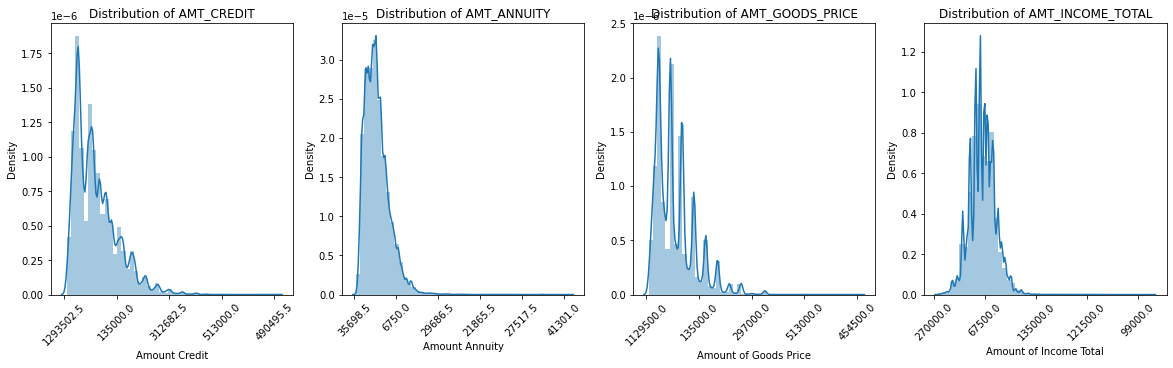

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,5)) 
#plt.figure(figsize=(12,5))
#plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"], ax=axes[0]).set_title("Distribution of AMT_CREDIT")
axes[0].set_xlabel("Amount Credit")
axes[0].set_xticklabels(app_train["AMT_CREDIT"], rotation=45)

ax = sns.distplot(app_train["AMT_ANNUITY"], ax=axes[1]).set_title("Distribution of AMT_ANNUITY")
axes[1].set_xlabel("Amount Annuity")
axes[1].set_xticklabels(app_train["AMT_ANNUITY"], rotation=45)

ax = sns.distplot(app_train["AMT_GOODS_PRICE"], ax=axes[2]).set_title("Distribution of AMT_GOODS_PRICE")
axes[2].set_xlabel("Amount of Goods Price")
axes[2].set_xticklabels(app_train["AMT_GOODS_PRICE"], rotation=45)

ax = sns.distplot(np.around(np.log(app_train["AMT_INCOME_TOTAL"]),2), ax=axes[3]).set_title("Distribution of AMT_INCOME_TOTAL")
axes[3].set_xlabel("Amount of Income Total")
axes[3].set_xticklabels(app_train["AMT_INCOME_TOTAL"], rotation=45)

### Numeric features

# Model

## Feature Engineering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new_df = pd.read_csv('/content/drive/My Drive/new_home_credit_dataset.csv')

In [ ]:
new_df.drop(['Unnamed: 0', 'index'], axis = 1, inplace=True)
new_df = new_df[new_df['CODE_GENDER'] != 'XNA']
new_df = new_df[new_df['AMT_INCOME_TOTAL'] < 20000000] # remove a outlier 117M
# NaN values for DAYS_EMPLOYED: 365.243 -> nan
new_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True) # set null value
new_df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True) # set null value

def get_age_label(days_birth):
        """ Return the age group label (int). """
        age_years = -days_birth / 365
        if age_years < 27: return 1
        elif age_years < 40: return 2
        elif age_years < 50: return 3
        elif age_years < 65: return 4
        elif age_years < 99: return 5
        else: return 0
    # Categorical age - based on target=1 plot
new_df['AGE_RANGE'] = new_df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

new_df['DAYS_EMPLOYED_PERC'] = new_df['DAYS_EMPLOYED'] / new_df['DAYS_BIRTH']
new_df['INCOME_CREDIT_PERC'] = new_df['AMT_INCOME_TOTAL'] / new_df['AMT_CREDIT']
new_df['PHONE_TO_BIRTH_RATIO'] = new_df['DAYS_LAST_PHONE_CHANGE'] / new_df['DAYS_BIRTH']
new_df['APPS_GOODS_INCOME_RATIO'] = new_df['AMT_GOODS_PRICE'] / new_df['AMT_INCOME_TOTAL']
new_df['APPS_INCOME_EMPLOYED_RATIO'] = new_df['AMT_INCOME_TOTAL'] / new_df['DAYS_EMPLOYED']
new_df['CREDIT_TO_GOODS_RATIO_2'] = new_df['AMT_CREDIT'] / new_df['AMT_GOODS_PRICE']
new_df['APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio'] = new_df['AMT_INCOME_TOTAL'] / 12. - new_df['AMT_ANNUITY']
new_df['APP_INCOME_TO_EMPLOYED_RATIO'] = new_df['AMT_INCOME_TOTAL'] / new_df['DAYS_EMPLOYED']
new_df['APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio'] = new_df['DAYS_LAST_PHONE_CHANGE'] / new_df['DAYS_EMPLOYED']
new_df['APP_DAYS_EMPLOYED_DAYS_BIRTH_diff'] = new_df['DAYS_EMPLOYED'] - new_df['DAYS_BIRTH']
new_df['ID_TO_BIRTH_RATIO'] = new_df['DAYS_ID_PUBLISH'] / new_df['DAYS_BIRTH']

new_df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,...,INSTAL_DBD_SUM,INSTAL_DBD_MIN,INSTAL_DBD_STD,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_PERC_MIN,INSTAL_PAYMENT_PERC_STD,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_VAR,INSTAL_PAYMENT_DIFF_MIN,INSTAL_PAYMENT_DIFF_STD,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_INSTALMENT_MIN,INSTAL_AMT_INSTALMENT_STD,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_AMT_PAYMENT_STD,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_STD,INSTAL_COUNT,AGE_RANGE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,PHONE_TO_BIRTH_RATIO,APPS_GOODS_INCOME_RATIO,APPS_INCOME_EMPLOYED_RATIO,CREDIT_TO_GOODS_RATIO_2,APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio,APP_INCOME_TO_EMPLOYED_RATIO,APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio,APP_DAYS_EMPLOYED_DAYS_BIRTH_diff,ID_TO_BIRTH_RATIO
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.0190,0.9722,0.0833,0.0198,0.9722,...,388.0,12.0,4.925171,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,53093.745,11559.247105,219625.695,9251.775,10058.037722,9251.775,53093.745,11559.247105,219625.695,10058.037722,-49.0,-315.421053,-5993.0,172.058877,19.0,1,0.067329,0.498036,0.119860,1.733333,-317.896389,1.158397,-7825.5,-317.896389,1.780220,8824.0,0.224078
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,0.9851,0.2917,0.0549,0.9851,0.2917,0.0554,0.9851,...,179.0,1.0,3.726929,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,560835.360,64754.586000,1618864.650,6662.970,110542.592300,6662.970,560835.360,64754.586000,1618864.650,110542.592300,-544.0,-1385.320000,-34633.0,757.325432,25.0,3,0.070862,0.208736,0.049389,4.183333,-227.272727,1.145199,-13198.5,-227.272727,0.696970,15577.0,0.017358
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,3.0,4.163332,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,10573.965,7096.155000,21288.465,5357.250,3011.871810,5357.250,10573.965,7096.155000,21288.465,3011.871810,-727.0,-761.666667,-2285.0,34.019602,3.0,4,0.011814,0.500000,0.042791,2.000000,-300.000000,1.000000,-1125.0,-300.000000,3.622222,18821.0,0.132889
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,310.0,1.0,25.397835,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,691786.890,62947.088438,1007153.415,2482.920,168097.624347,2482.920,691786.890,62947.088438,1007153.415,168097.624347,-12.0,-271.625000,-4346.0,198.045744,16.0,4,0.159905,0.431748,0.032465,2.200000,-44.422507,1.052803,-18436.5,-44.422507,0.203027,15966.0,0.128229
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0

In [ ]:
app_train = new_df[new_df['TARGET'].notnull()].copy()
app_test = new_df[new_df['TARGET'].isnull()].copy()
app_train = app_train.replace([np.inf, -np.inf], np.nan)
app_train = app_train.reset_index()
app_train.head()

,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,...,INSTAL_DBD_SUM,INSTAL_DBD_MIN,INSTAL_DBD_STD,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_VAR,INSTAL_PAYMENT_PERC_MIN,INSTAL_PAYMENT_PERC_STD,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_VAR,INSTAL_PAYMENT_DIFF_MIN,INSTAL_PAYMENT_DIFF_STD,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_INSTALMENT_MIN,INSTAL_AMT_INSTALMENT_STD,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_AMT_PAYMENT_STD,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_STD,INSTAL_COUNT,AGE_RANGE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,PHONE_TO_BIRTH_RATIO,APPS_GOODS_INCOME_RATIO,APPS_INCOME_EMPLOYED_RATIO,CREDIT_TO_GOODS_RATIO_2,APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio,APP_INCOME_TO_EMPLOYED_RATIO,APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio,APP_DAYS_EMPLOYED_DAYS_BIRTH_diff,ID_TO_BIRTH_RATIO
0,0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.0190,0.9722,0.0833,0.0198,...,388.0,12.0,4.925171,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,53093.745,11559.247105,219625.695,9251.775,10058.037722,9251.775,53093.745,11559.247105,219625.695,10058.037722,-49.0,-315.421053,-5993.0,172.058877,19.0,1,0.067329,0.498036,0.119860,1.733333,-317.896389,1.158397,-7825.5,-317.896389,1.780220,8824.0,0.224078
1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,0.9851,0.2917,0.0549,0.9851,0.2917,0.0554,...,179.0,1.0,3.726929,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,560835.360,64754.586000,1618864.650,6662.970,110542.592300,6662.970,560835.360,64754.586000,1618864.650,110542.592300,-544.0,-1385.320000,-34633.0,757.325432,25.0,3,0.070862,0.208736,0.049389,4.183333,-227.272727,1.145199,-13198.5,-227.272727,0.696970,15577.0,0.017358
2,2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,3.0,4.163332,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,10573.965,7096.155000,21288.465,5357.250,3011.871810,5357.250,10573.965,7096.155000,21288.465,3011.871810,-727.0,-761.666667,-2285.0,34.019602,3.0,4,0.011814,0.500000,0.042791,2.000000,-300.000000,1.000000,-1125.0,-300.000000,3.622222,18821.0,0.132889
3,3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,310.0,1.0,25.397835,1.0,1.000000,0.000000,1.00000,0.000000,0.000,0.000000,0.000000e+00,0.0,0.000000,691786.890,62947.088438,1007153.415,2482.920,168097.624347,2482.920,691786.890,62947.088438,1007153.415,168097.624347,-12.0,-271.625000,-4346.0,198.045744,16.0,4,0.159905,0.431748,0.032465,2.200000,-44.422507,1.052803,-18436.5,-44.422507,0.203027,15966.0,0.128229
4,4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Với biến chỉ có 2 giá trị, dùng label encoding, nếu nhiều hơn thì chuyển sang encoding rồi dùng one-hot encoding 
# Create a label encoder object
le = LabelEncoder()
le_count = 0
lst_name = []
# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            lst_name.append(col)
            # Keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [ ]:
# apply one-hot encoding với các biến đã dùng label encoding, trong pd dùng get_dummies, trong scikit learn là one hot encoding
#one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307506, 535)
Testing Features shape:  (48744, 534)


In [ ]:
top_features = [
'CODE_GENDER', 'NEW_EXT_SOURCES_MEAN', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
'NEW_SCORES_STD','BURO_DAYS_CREDIT_VAR','DAYS_ID_PUBLISH',
'DAYS_BIRTH','DAYS_REGISTRATION','DAYS_EMPLOYED',
'NEW_EMPLOY_TO_BIRTH_RATIO', 'PREV_APP_CREDIT_PERC_MEAN','CLOSED_AMT_CREDIT_SUM_SUM',
'CLOSED_DAYS_CREDIT_VAR','LIVINGAREA_MEDI','NAME_EDUCATION_TYPE_Higher education',
'DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','AMT_CREDIT'
]
Second_features=['LIVINGAREA_AVG','FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','AMT_INCOME_TOTAL','AMT_ANNUITY','FLAG_PHONE',
                'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'] 

fearure_engineering_feas = ['DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'PHONE_TO_BIRTH_RATIO', 'APPS_GOODS_INCOME_RATIO', 'APPS_INCOME_EMPLOYED_RATIO', 'CREDIT_TO_GOODS_RATIO_2',
'APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio', 'APP_INCOME_TO_EMPLOYED_RATIO', 'APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio',
'APP_DAYS_EMPLOYED_DAYS_BIRTH_diff', 'ID_TO_BIRTH_RATIO']

In [ ]:
#app_train_top_features = pd.DataFrame
app_train_top_features = app_train[top_features + Second_features + fearure_engineering_feas+['TARGET']].copy()

app_train_top_features.head()                                                   

,CODE_GENDER,NEW_EXT_SOURCES_MEAN,EXT_SOURCE_3,EXT_SOURCE_2,NEW_SCORES_STD,BURO_DAYS_CREDIT_VAR,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_EMPLOYED,NEW_EMPLOY_TO_BIRTH_RATIO,PREV_APP_CREDIT_PERC_MEAN,CLOSED_AMT_CREDIT_SUM_SUM,CLOSED_DAYS_CREDIT_VAR,LIVINGAREA_MEDI,NAME_EDUCATION_TYPE_Higher education,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,AMT_CREDIT,LIVINGAREA_AVG,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,AMT_INCOME_TOTAL,AMT_ANNUITY,FLAG_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,PHONE_TO_BIRTH_RATIO,APPS_GOODS_INCOME_RATIO,APPS_INCOME_EMPLOYED_RATIO,CREDIT_TO_GOODS_RATIO_2,APP_AMT_INCOME_TOTAL_12_AMT_ANNUITY_ratio,APP_INCOME_TO_EMPLOYED_RATIO,APP_DAYS_LAST_PHONE_CHANGE_DAYS_EMPLOYED_ratio,APP_DAYS_EMPLOYED_DAYS_BIRTH_diff,ID_TO_BIRTH_RATIO,TARGET
0,0,0.161787,0.139376,0.262949,0.092026,186150.000000,-2120,-9461,-3648.0,-637.0,0.067329,1.000000,383067.0,123956.700000,0.0193,0,-1134.0,351000.0,406597.5,0.0190,0.0833,0.0833,0.0833,202500.0,24700.5,1,2,2,0.067329,0.498036,0.119860,1.733333,-317.896389,1.158397,-7825.5,-317.896389,1.780220,8824.0,0.224078,1.0
1,1,0.466757,NaN,0.622246,0.219895,827783.583333,-291,-16765,-1186.0,-1188.0,0.070862,0.949329,207400.5,820590.333333,0.0558,1,-828.0,1129500.0,1293502.5,0.0549,0.2917,0.2917,0.2917,270000.0,35698.5,1,1,1,0.070862,0.208736,0.049389,4.183333,-227.272727,1.145199,-13198.5,-227.272727,0.696970,15577.0,0.017358,0.0
2,0,0.642739,0.729567,0.555912,0.122792,421362.000000,-2531,-19046,-4260.0,-225.0,0.011814,1.207699,189037.8,421362.000000,NaN,0,-815.0,135000.0,135000.0,NaN,NaN,NaN,NaN,67500.0,6750.0,1,2,2,0.011814,0.500000,0.042791,2.000000,-300.000000,1.000000,-1125.0,-300.000000,3.622222,18821.0,0.132889,0.0
3,1,0.650442,NaN,0.650442,0.151007,NaN,-2437,-19005,-9833.0,-3039.0,0.159905,1.010763,NaN,NaN,NaN,0,-617.0,297000.0,312682.5,NaN,NaN,NaN,NaN,135000.0,29686.5,0,2,2,0.159905,0.431748,0.032465,2.200000,-44.422507,1.052803,-18436.5,-44.422507,0.203027,15966.0,0.128229,0.0
4,0,0.322738,NaN,0.322738,0.151007,NaN,-3458,-19932,-4311.0,-3038.0,0.152418,0.969650,146250.0,NaN,NaN,0,-1106.0,513000.0,513000.0,NaN,NaN,NaN,NaN,121500.0,21865.5,0,2,2,0.152418,0.236842,0.055489,4.222222,-39.993417,1.000000,-11740.5,-39.993417,0.364055,16894.0,0.173490,0.0


In [ ]:
def preprocessing(df):
    # Create a label encoder object
    le = LabelEncoder()
    le_count = 0

    # Iterate through the columns
    for col in df:
        if df[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(df[col].unique())) <= 2:
                # Train on the training data
                le.fit(df[col])
                # Transform both training and testing data
                df[col] = le.transform(df[col])
                

                # Keep track of how many columns were label encoded
                le_count += 1

    print('%d columns were label encoded.' % le_count)
    # one-hot encoding of categorical variables
    df = pd.get_dummies(df)
    print('Training Features shape: ', df.shape)
    from sklearn.model_selection import train_test_split
    features = df.loc[:, df.columns != 'TARGET']
    target = df.TARGET
    class_names = df.TARGET

    features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size = 0.20, random_state = 10)
    features_train.shape,features_test.shape, target_train.shape, target_test.shape
    features_train=features_train.fillna(features_train.mean())
    list_categorical=[]
    for col in features_train:
        if features_train[col].dtype == 'object'  and features_train[col].isnull().values.any():
            list_categorical.append(col)
            
            
    from sklearn_pandas import CategoricalImputer
    imputer = CategoricalImputer()
    for col in list_categorical:
        data=features_train[col]
        features_train[col]=imputer.fit_transform(data)

    features_test=features_test.fillna(features_test.mean())
    list_categorical=[]
    for col in features_test:
        if features_test[col].dtype == 'object'  and features_test[col].isnull().values.any():
            list_categorical.append(col)
            
            
    from sklearn_pandas import CategoricalImputer
    imputer = CategoricalImputer()
    for col in list_categorical:
        data=features_test[col]
        features_test[col]=imputer.fit_transform(data)
    print(features_train.shape,features_test.shape, target_train.shape, target_test.shape)
    return features_train, features_test, target_train, target_test

In [ ]:
a = app_train_top_features.copy()

In [ ]:
features_train, features_test, target_train, target_test = preprocessing(a)

0 columns were label encoded.
Training Features shape:  (307506, 40)
(246004, 39) (61502, 39) (246004,) (61502,)


In [ ]:
def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    return roc

## Classification Models Report

In [ ]:
'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

'''Metrics/Evaluation'''
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

In [ ]:
#Creating a dict of the models
model_dict = {'Dummy' : DummyClassifier(random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(n_estimators= 200, max_depth=15, bootstrap=True, random_state=42),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier(),
              'Logistic Regression': LogisticRegression(penalty = 'l2', C= 10),
              'LightGBM': lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)}

#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, auc_score, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        if k != 'LightGBM':
            v.fit(features_train, target_train)
        else:
            v.fit(features_train, target_train, eval_metric='auc', 
                  eval_set=[(features_train, target_train),(features_test, target_test)])
        target_pred = v.predict(features_test)
        predicted_probas = v.predict_proba(features_test)
        ac_score_list.append(accuracy_score(target_test, target_pred))
        auc_score.append(roc_auc_score(target_test, predicted_probas[:,1]))
        r_score_list.append(recall_score(target_test, target_pred, average='macro'))
        f1_score_list.append(f1_score(target_test, target_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, auc_score, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'auc_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='auc_score', ascending=False)
        #print(k)
        #print(roc_auc_score(target_test, predicted_probas[:,1]))
    return model_comparison_df

model_score_df(model_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[1]	training's auc: 0.729443	training's binary_logloss: 0.678021	valid_1's auc: 0.723833	valid_1's binary_logloss: 0.677891
[2]	training's auc: 0.733498	training's binary_logloss: 0.665537	valid_1's auc: 0.727519	valid_1's binary_logloss: 0.665296
[3]	training's auc: 0.736938	training's binary_logloss: 0.65512	valid_1's auc: 0.729772	valid_1's binary_logloss: 0.654849
[4]	training's auc: 0.738234	training's binary_logloss: 0.646448	valid_1's auc: 0.730797	valid_1's binary_logloss: 0.645817
[5]	training's auc: 0.739374	training's binary_logloss: 0.639084	valid_1's auc: 0.731904	valid_1's binary_logloss: 0.638248
[6]	training's auc: 0.741054	training's binary_logloss: 0.632738	valid_1's auc: 0.732699	valid_1's binary_logloss: 0.63139
[7]	training's auc: 0.742703	training's binary_logloss: 0.627212	valid_1's auc: 0.734084	valid_1's binary_logloss: 0.625886
[8]	training's auc: 0.743691	training's binary_logloss: 0.622576	valid_1's auc: 0.734638	valid_1's binary_logloss: 0.621393
[9]	traini

,model_name,accuracy_score,auc_score,recall_score,f1_score
8,LightGBM,0.724529,0.750919,0.683056,0.548799
4,AdaBoost,0.921043,0.74212,0.505597,0.491095
2,Random Forest,0.920946,0.740904,0.50245,0.484504
7,Logistic Regression,0.920751,0.618501,0.5,0.47937
5,Gaussian Naive Bayes,0.910881,0.612049,0.501766,0.490143
3,Decsision Tree,0.850883,0.542033,0.542033,0.537527
6,K Nearest Neighbor,0.91545,0.534578,0.503122,0.489917
1,Stochastic Gradient Descent,0.920734,0.499991,0.499991,0.479366
0,Dummy,0.85033,0.497761,0.497761,0.497785


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
logistic = LogisticRegression()
pipe = Pipeline(steps=[('sc', sc),
                       ('logistic', logistic)])


C = [0.01, 0.1, 1, 10, 100]
# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']

# Create a dictionary of all the parameter options. We can access the parameters of steps of a pipeline by using '__'

parameters = dict(logistic__C=C, logistic__penalty=penalty)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
cv = GridSearchCV(pipe, parameters, cv=10)

cv.fit(features_train, target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
           

In [ ]:
cv.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2'}

In [ ]:
lr = LogisticRegression(penalty = 'l2', C= 10, random_state = 12)

In [ ]:
lr.fit(features_train, target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(features_test)
predicted_probas = lr.predict_proba(features_test)

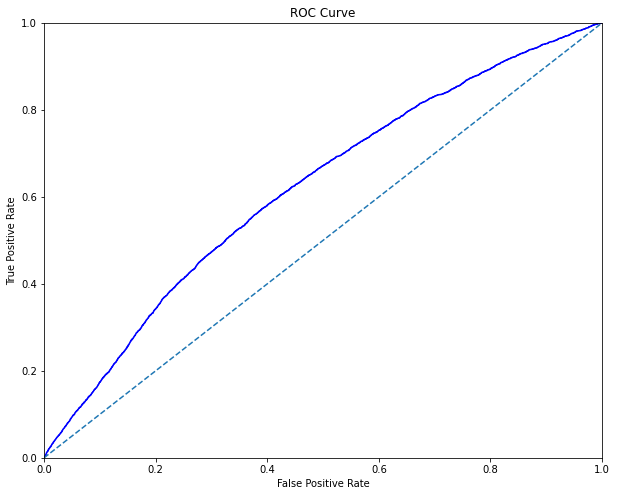

In [ ]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(target_test, predicted_probas[:,1])
  
# Lưu biểu đồ vào p1
p1 = _plot_roc_curve(fpr, tpr, thres)

In [ ]:
from sklearn.metrics import auc
#0.6667118723904264
auc(fpr, tpr)

0.6185008284926217

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, y_pred)
cnf_matrix

array([[56590,     0],
       [ 4912,     0]])

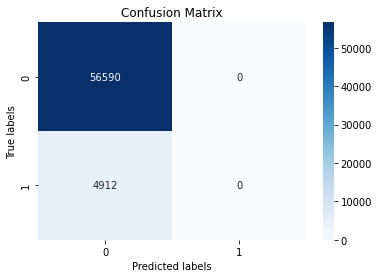

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
svm = SVC()
pipe = Pipeline(steps=[('sc', sc),
                       ('SVM', svm)])

C = [0.01, 0.1, 1, 10]
gamma = ['scale', 'auto']

parameters = dict(SVM__C=C, SVM__gamma=gamma)

# Conduct Parameter Optmization With Pipeline
# Create a grid search object
cv = GridSearchCV(pipe, parameters, cv=5)

#cv.fit(features_train, target_train)

In [ ]:
cv.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2'}

In [ ]:
#Using SVM with the best parameters obtained from GridSearchCV
svm_cv=SVC(C=1,gamma='scale', kernel='linear')


In [ ]:
# Training the SVM model
svm_cv.fit(features_train, target_train)

In [ ]:
y_pred = svm_cv.predict(features_test)
predicted_probas = svm_cv.predict_proba(features_test)

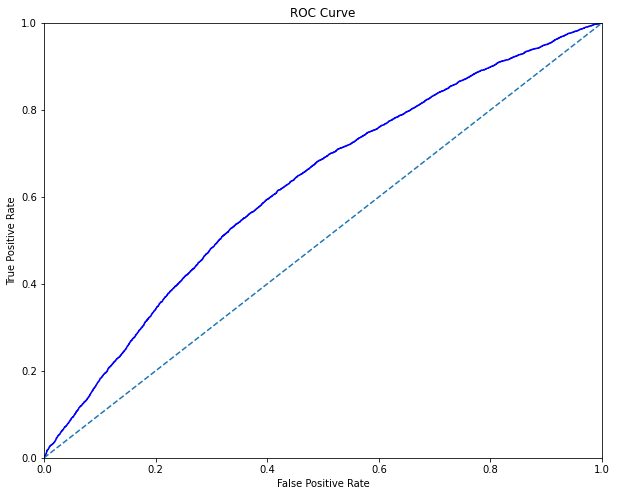

In [ ]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(target_test, predicted_probas[:,1])
  
# Lưu biểu đồ vào p1
p1 = _plot_roc_curve(fpr, tpr, thres)

In [ ]:
from sklearn.metrics import auc
#0.6667118723904264
auc(fpr, tpr)

0.6238873910458277

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas = clf.predict_proba(features_test)

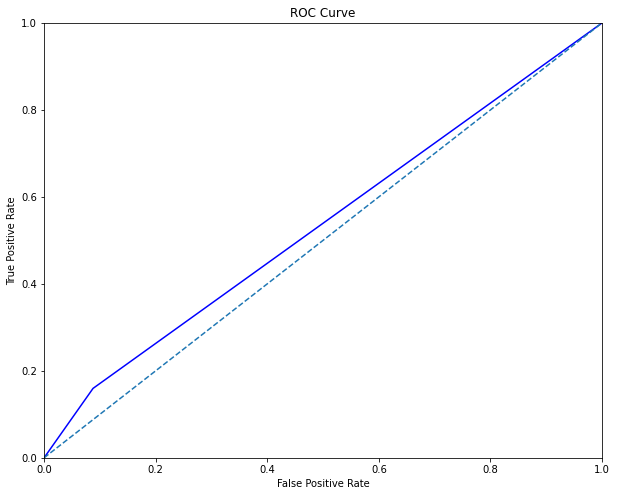

In [ ]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(target_test, predicted_probas[:,1])
  
# Lưu biểu đồ vào p1
p2 = _plot_roc_curve(fpr, tpr, thres)


In [ ]:
from sklearn.metrics import auc
#0.5421650238116087
auc(fpr, tpr)

0.5359275501881354

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

rfr = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth' : [5, 10, 15],
    'bootstrap': [True]
}

#Using GridSearchCV for optimal hyperparameters and noting how much time it takes to train the model

cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
cv.fit(features_train, target_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
cv.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 200}

In [ ]:
#Using RFR with the best parameters obtained from GridSearchCV
rfc1 = RandomForestClassifier(n_estimators= 200, max_depth=15, bootstrap=True, random_state=42)

In [ ]:
rfc1.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rfc1.predict(features_test)
predicted_probas = rfc1.predict_proba(features_test)

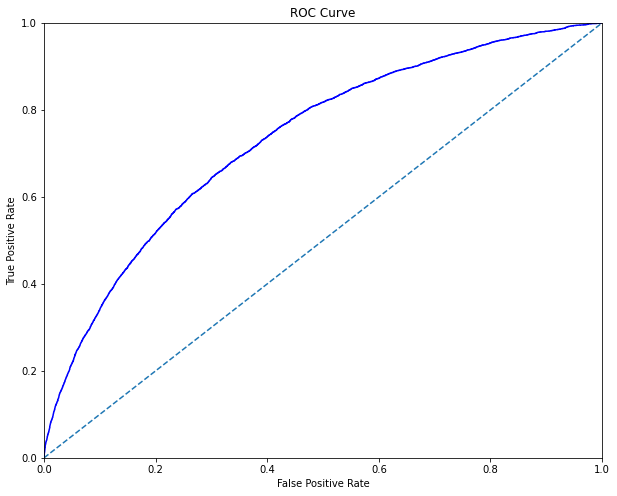

In [ ]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(target_test, predicted_probas[:,1])
  
# Lưu biểu đồ vào p1
p1 = _plot_roc_curve(fpr, tpr, thres)

In [ ]:
from sklearn.metrics import auc
#0.6667118723904264
auc(fpr, tpr)

0.7334655154252574

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(features_train, target_train)

y_pred=clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(target_test, predicted_probas[:,1])
  
# Lưu biểu đồ vào p1
p3 = _plot_roc_curve(fpr, tpr, thres)


In [ ]:
from sklearn.metrics import auc
#0.7177734130722158
auc(fpr, tpr)

In [ ]:
# Extract feature importances
features = list(a.columns)
features.remove('TARGET')
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:20]))), 
            df['importance_normalized'].head(20), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:20]))))
    ax.set_yticklabels(df['feature'].head(20))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [ ]:
feature_importances_sorted = plot_feature_importances(feature_importances)

## LightGBM

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from lightgbm import LGBMClassifier
import gc

In [ ]:
lgb_classifier = LGBMClassifier(nthread=-1,
                            n_estimators=5000,
                            learning_rate=0.01,
                            max_depth=11,
                            num_leaves=58,
                            colsample_bytree=0.613,
                            subsample=0.708,
                            max_bin=407,
                            reg_alpha=3.564,
                            reg_lambda=4.930,
                            min_child_weight=6,
                            min_child_samples=165,
                            silent=-1,
                            verbose=-1,)
lgb_classifier

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.613,
               importance_type='split', learning_rate=0.01, max_bin=407,
               max_depth=11, min_child_samples=165, min_child_weight=6,
               min_split_gain=0.0, n_estimators=5000, n_jobs=-1, nthread=-1,
               num_leaves=58, objective=None, random_state=None,
               reg_alpha=3.564, reg_lambda=4.93, silent=-1, subsample=0.708,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [ ]:
model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)
#model = lgb_classifier
model.fit(features_train, target_train, eval_metric='auc', 
          eval_set=[(features_train, target_train),(features_test, target_test)])

[1]	training's binary_logloss: 0.678021	training's auc: 0.729443	valid_1's binary_logloss: 0.677891	valid_1's auc: 0.723833
[2]	training's binary_logloss: 0.665537	training's auc: 0.733498	valid_1's binary_logloss: 0.665296	valid_1's auc: 0.727519
[3]	training's binary_logloss: 0.65512	training's auc: 0.736938	valid_1's binary_logloss: 0.654849	valid_1's auc: 0.729772
[4]	training's binary_logloss: 0.646448	training's auc: 0.738234	valid_1's binary_logloss: 0.645817	valid_1's auc: 0.730797
[5]	training's binary_logloss: 0.639084	training's auc: 0.739374	valid_1's binary_logloss: 0.638248	valid_1's auc: 0.731904
[6]	training's binary_logloss: 0.632738	training's auc: 0.741054	valid_1's binary_logloss: 0.63139	valid_1's auc: 0.732699
[7]	training's binary_logloss: 0.627212	training's auc: 0.742703	valid_1's binary_logloss: 0.625886	valid_1's auc: 0.734084
[8]	training's binary_logloss: 0.622576	training's auc: 0.743691	valid_1's binary_logloss: 0.621393	valid_1's auc: 0.734638
[9]	traini

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=22, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
# Predict the probability score
#prob_train = model.predict_proba(X_train_scaled)
predicted_probas = model.predict_proba(features_test)

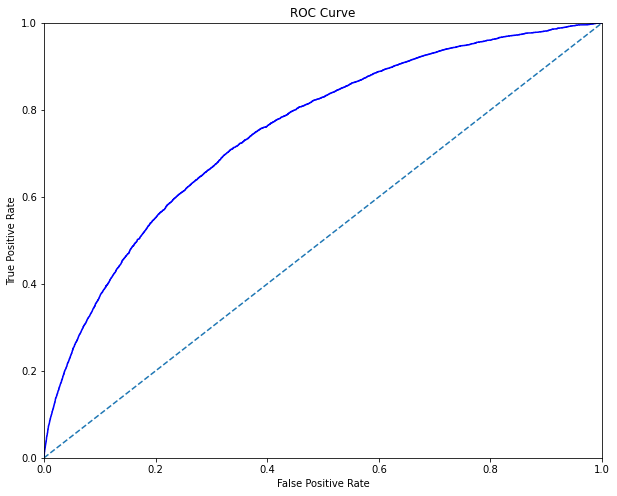

In [ ]:
# Biểu diễn đường roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(target_test, predicted_probas[:,1])
  
# Lưu biểu đồ vào p1
p1 = _plot_roc_curve(fpr, tpr, thres)

In [ ]:
from sklearn.metrics import auc
#0.7609513284243766
auc(fpr, tpr)

0.750918737405476

## LightGBM with KFold

In [ ]:
def kfold_lightgbm_sklearn(data, categorical_feature = None):
    df = data[data['TARGET'].notnull()]
    #test = data[data['TARGET'].isnull()]
    #print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))
    del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
    predictors = list(filter(lambda v: v not in del_features, df.columns))

    if not STRATIFIED_KFOLD:
        folds = KFold(n_splits= NUM_FOLDS, shuffle=True, random_state= RANDOM_SEED)
    else:
        folds = StratifiedKFold(n_splits= NUM_FOLDS, shuffle=True, random_state= RANDOM_SEED)

    # Hold oof predictions, test predictions, feature importance and training/valid auc
    oof_preds = np.zeros(df.shape[0])
    #sub_preds = np.zeros(test.shape[0])
    importance_df = pd.DataFrame()
    eval_results = dict()

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df[predictors], df['TARGET'])):
        train_x, train_y = df[predictors].iloc[train_idx], df['TARGET'].iloc[train_idx]
        valid_x, valid_y = df[predictors].iloc[valid_idx], df['TARGET'].iloc[valid_idx]

        params = {'random_state': RANDOM_SEED, 'nthread': NUM_THREADS}
        clf = LGBMClassifier(**{**params, **LIGHTGBM_PARAMS})
        if not categorical_feature:
            clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
                    eval_metric='auc', verbose=400, early_stopping_rounds= EARLY_STOPPING)
        else:
            clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)],
                    eval_metric='auc', verbose=400, early_stopping_rounds=EARLY_STOPPING,
                    feature_name= list(df[predictors].columns), categorical_feature= categorical_feature)
        print('check')
        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        #sub_preds += clf.predict_proba(test[predictors], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        print('pass')
        # Feature importance by GAIN and SPLIT
        fold_importance = pd.DataFrame()
        fold_importance["feature"] = predictors
        fold_importance["gain"] = clf.booster_.feature_importance(importance_type='gain')
        fold_importance["split"] = clf.booster_.feature_importance(importance_type='split')
        importance_df = pd.concat([importance_df, fold_importance], axis=0)
        eval_results['train_{}'.format(n_fold+1)]  = clf.evals_result_['training']['auc']
        eval_results['valid_{}'.format(n_fold+1)] = clf.evals_result_['valid_1']['auc']

        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
        #gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(df['TARGET'], oof_preds))
    #test['TARGET'] = sub_preds.copy()

    # Get the average feature importance between folds
    #mean_importance = importance_df.groupby('feature').mean().reset_index()
    #mean_importance.sort_values(by= 'gain', ascending=False, inplace=True)
    # Save feature importance, test predictions and oof predictions as csv
    
    #return mean_importance

In [ ]:
# ------------------------- CONFIGURATIONS -------------------------

# GENERAL CONFIGURATIONS
NUM_THREADS = 4
DATA_DIRECTORY = "../input/"
SUBMISSION_SUFIX = "_model2_04"

# INSTALLMENTS TREND PERIODS
INSTALLMENTS_LAST_K_TREND_PERIODS =  [12, 24, 60, 120]

# LIGHTGBM CONFIGURATION AND HYPER-PARAMETERS
GENERATE_SUBMISSION_FILES = True
STRATIFIED_KFOLD = False
RANDOM_SEED = 737851
NUM_FOLDS = 5
EARLY_STOPPING = 50

LIGHTGBM_PARAMS = {
    'boosting_type': 'goss',
    'n_estimators': 10000,
    'learning_rate': 0.005134,
    'num_leaves': 54,
    'max_depth': 10,
    'subsample_for_bin': 240000,
    'reg_alpha': 0.436193,
    'reg_lambda': 0.479169,
    'colsample_bytree': 0.508716,
    'min_split_gain': 0.024766,
    'subsample': 1,
    'is_unbalance': False,
    'silent':-1,
    'verbose':-1
}

In [ ]:
#feat_importance = 
kfold_lightgbm_sklearn(app_train_top_features)
#print(feat_importance)

Training until validation scores don't improve for 50 rounds.
[400]	training's binary_logloss: 0.245448	training's auc: 0.769915	valid_1's binary_logloss: 0.252637	valid_1's auc: 0.743905
[800]	training's binary_logloss: 0.238153	training's auc: 0.787623	valid_1's binary_logloss: 0.249818	valid_1's auc: 0.748972
[1200]	training's binary_logloss: 0.233198	training's auc: 0.802752	valid_1's binary_logloss: 0.249013	valid_1's auc: 0.751433
[1600]	training's binary_logloss: 0.229007	training's auc: 0.816089	valid_1's binary_logloss: 0.248705	valid_1's auc: 0.7525
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.227714	training's auc: 0.820116	valid_1's binary_logloss: 0.248649	valid_1's auc: 0.752671
check
pass
Fold  1 AUC : 0.752671
Training until validation scores don't improve for 50 rounds.
[400]	training's binary_logloss: 0.245934	training's auc: 0.769129	valid_1's binary_logloss: 0.250553	valid_1's auc: 0.749257
[800]	training's binary_logloss: 0.238645	training